# 07.02 - Pandas Plotting

**Autor:** Miguel Angel Vazquez Varela  
**Nivel:** Intermedio  
**Tiempo estimado:** 25 min

---

## Que aprenderemos?

- Graficar directamente desde DataFrames
- Tipos de graficos con `.plot()`
- Graficos rapidos para exploracion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

---

## Datos de ejemplo

In [2]:
# Datos mensuales
monthly = pd.DataFrame({
    "month": pd.date_range("2024-01-01", periods=12, freq="M"),
    "Sol": [1200, 1350, 1500, 1450, 1600, 1800, 1900, 1850, 1700, 1500, 1300, 1250],
    "Atocha": [900, 950, 1100, 1050, 1200, 1400, 1500, 1450, 1300, 1100, 950, 900],
    "Retiro": [600, 700, 850, 800, 950, 1100, 1200, 1150, 1000, 850, 700, 650]
})
monthly = monthly.set_index("month")
monthly.head()

C:\Users\miguel.vazquez\AppData\Local\Temp\ipykernel_12532\2465790767.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "month": pd.date_range("2024-01-01", periods=12, freq="M"),


,Sol,Atocha,Retiro
month,,,
2024-01-31,1200,900,600
2024-02-29,1350,950,700
2024-03-31,1500,1100,850
2024-04-30,1450,1050,800
2024-05-31,1600,1200,950


In [3]:
# Datos de viajes
np.random.seed(42)
trips = pd.DataFrame({
    "duration": np.random.exponential(20, 500),
    "distance": np.random.exponential(4, 500),
    "station": np.random.choice(["Sol", "Atocha", "Retiro", "Cibeles"], 500),
    "user_type": np.random.choice(["subscriber", "casual"], 500, p=[0.7, 0.3])
})
trips.head()

,duration,distance,station,user_type
0,9.385362,4.791456,Retiro,casual
1,60.202429,3.072314,Cibeles,subscriber
2,26.334914,1.481517,Atocha,subscriber
3,18.258851,6.723629,Cibeles,subscriber
4,3.392497,4.617318,Cibeles,subscriber


---

## 1. Grafico de lineas

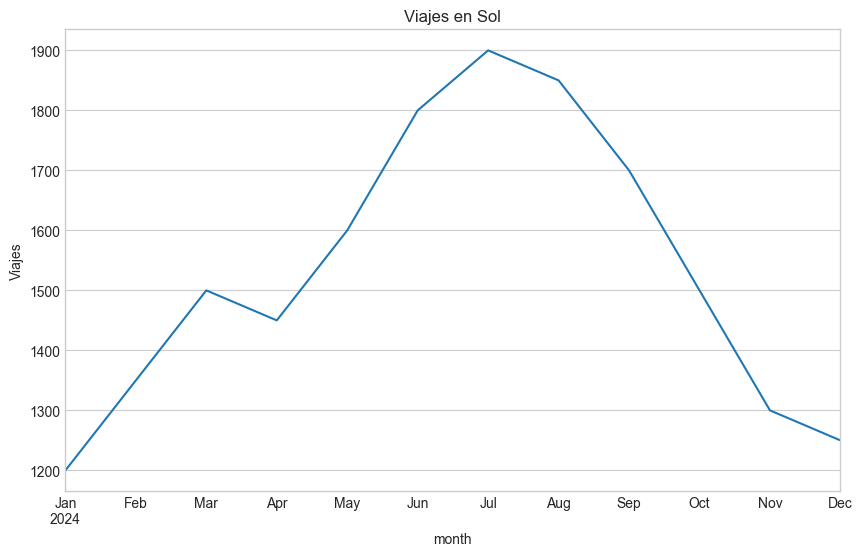

In [4]:
# Una columna
monthly["Sol"].plot(figsize=(10, 6), title="Viajes en Sol")
plt.ylabel("Viajes")
plt.show()

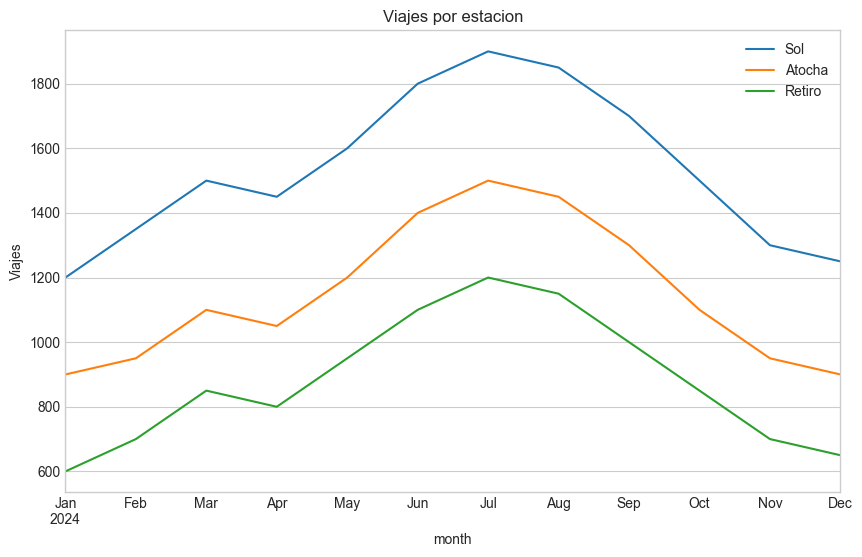

In [5]:
# Todas las columnas
monthly.plot(figsize=(10, 6), title="Viajes por estacion")
plt.ylabel("Viajes")
plt.show()

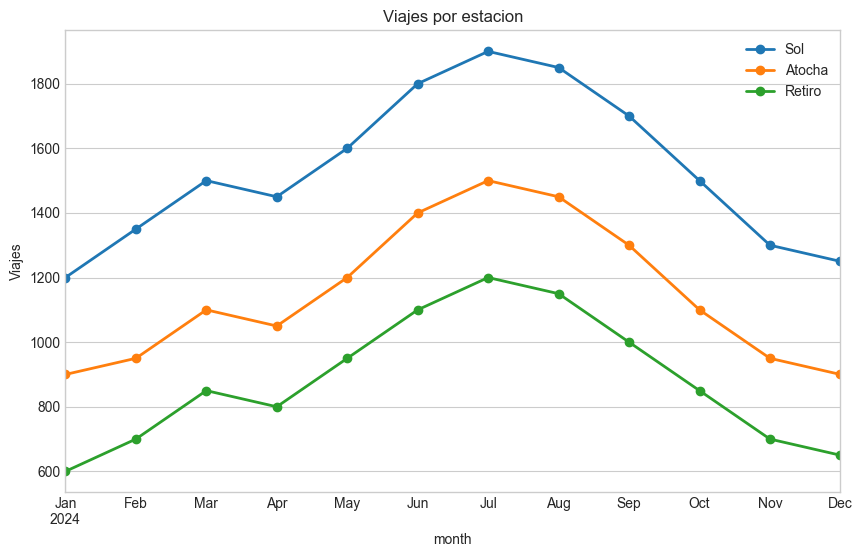

In [6]:
# Personalizar
monthly.plot(
    figsize=(10, 6),
    title="Viajes por estacion",
    linewidth=2,
    marker='o',
    markersize=6
)
plt.ylabel("Viajes")
plt.legend(loc='upper right')
plt.show()

---

## 2. Grafico de barras

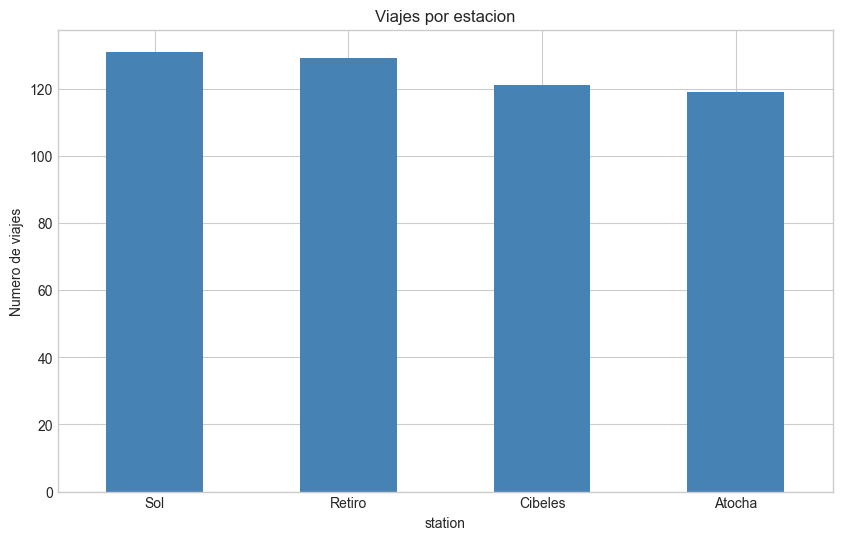

In [7]:
# Conteo por estacion
trips["station"].value_counts().plot(
    kind="bar",
    figsize=(10, 6),
    title="Viajes por estacion",
    color="steelblue"
)
plt.ylabel("Numero de viajes")
plt.xticks(rotation=0)
plt.show()

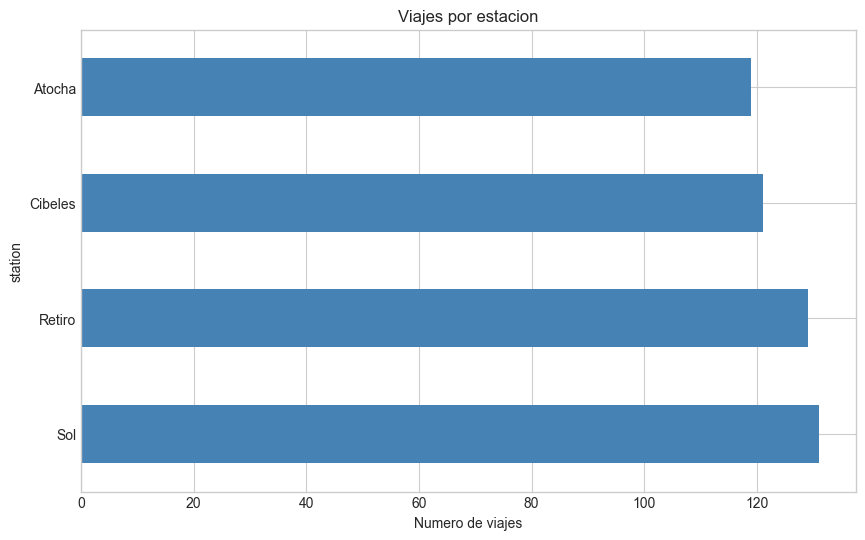

In [8]:
# Barras horizontales
trips["station"].value_counts().plot(
    kind="barh",
    figsize=(10, 6),
    title="Viajes por estacion",
    color="steelblue"
)
plt.xlabel("Numero de viajes")
plt.show()

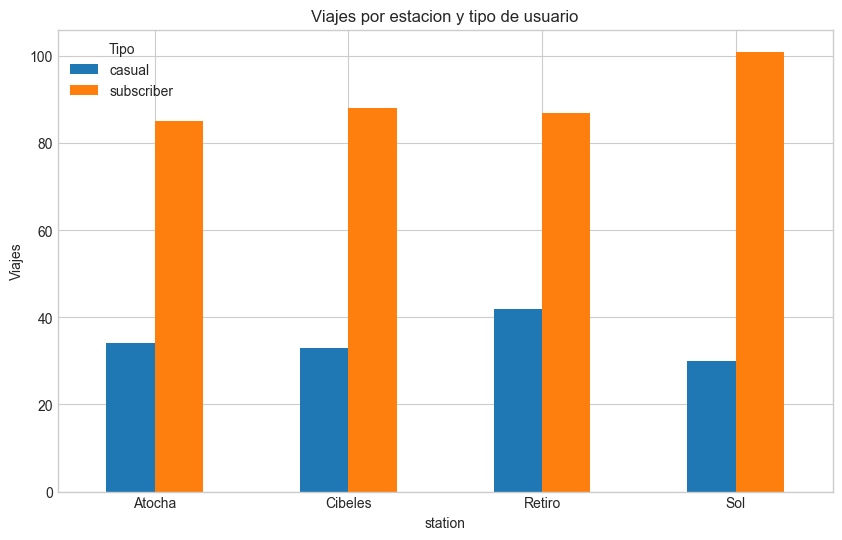

In [9]:
# Barras agrupadas desde pivot
pivot = trips.groupby(["station", "user_type"]).size().unstack()
pivot.plot(
    kind="bar",
    figsize=(10, 6),
    title="Viajes por estacion y tipo de usuario"
)
plt.ylabel("Viajes")
plt.xticks(rotation=0)
plt.legend(title="Tipo")
plt.show()

### Barras apiladas

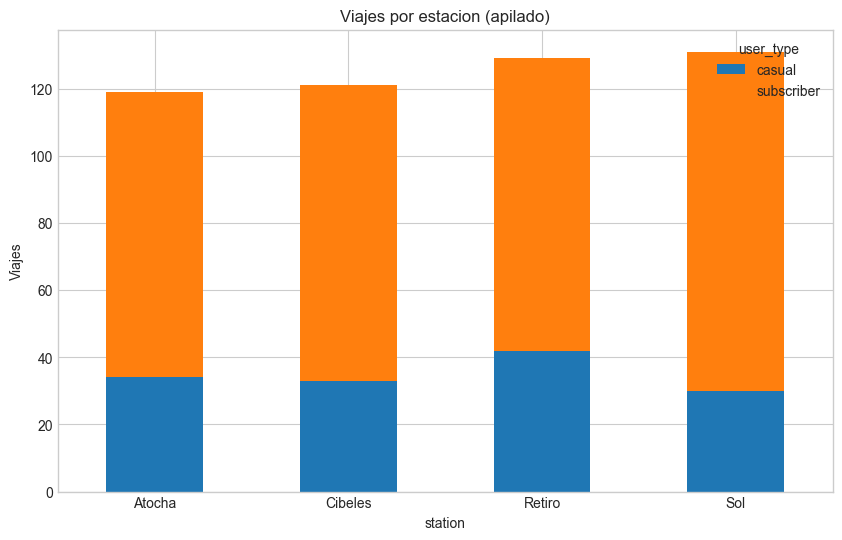

In [10]:
pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    title="Viajes por estacion (apilado)"
)
plt.ylabel("Viajes")
plt.xticks(rotation=0)
plt.show()

---

## 3. Histograma

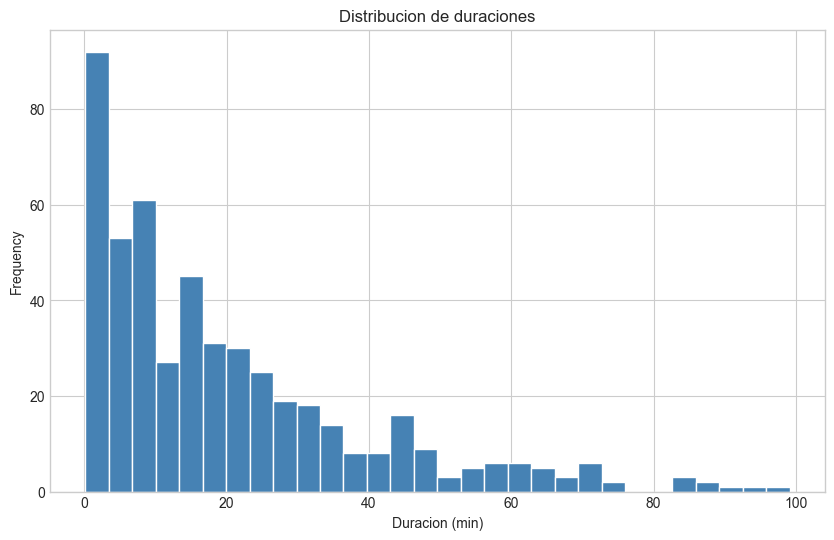

In [11]:
trips["duration"].plot(
    kind="hist",
    bins=30,
    figsize=(10, 6),
    title="Distribucion de duraciones",
    color="steelblue",
    edgecolor="white"
)
plt.xlabel("Duracion (min)")
plt.show()

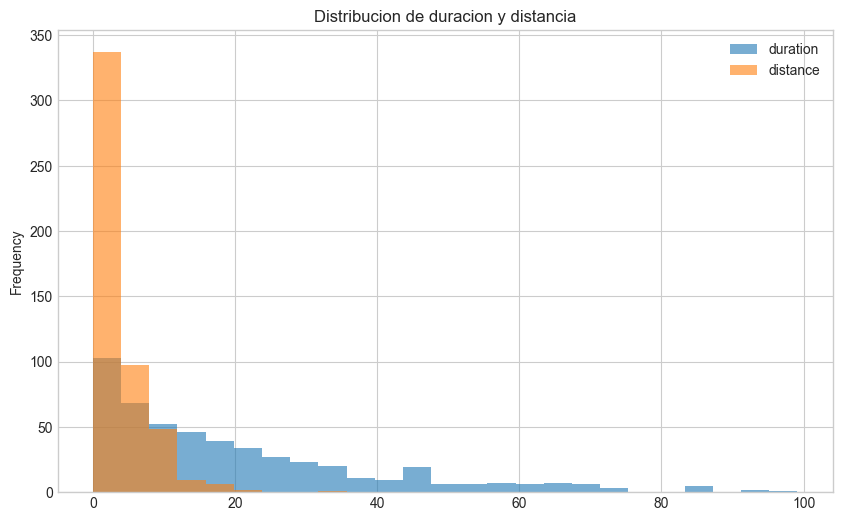

In [12]:
# Multiples histogramas
trips[["duration", "distance"]].plot(
    kind="hist",
    bins=25,
    alpha=0.6,
    figsize=(10, 6),
    title="Distribucion de duracion y distancia"
)
plt.show()

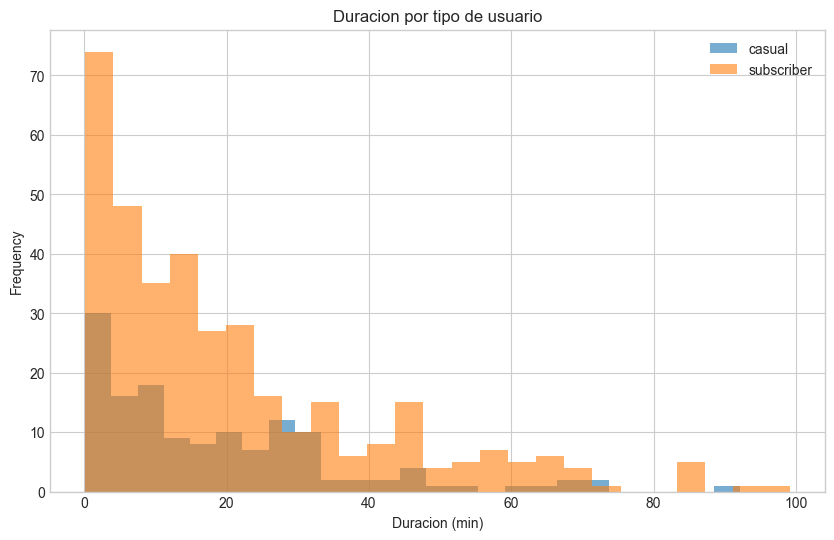

In [13]:
# Histograma por grupo
trips.groupby("user_type")["duration"].plot(
    kind="hist",
    alpha=0.6,
    bins=25,
    legend=True,
    figsize=(10, 6),
    title="Duracion por tipo de usuario"
)
plt.xlabel("Duracion (min)")
plt.show()

---

## 4. Box plot

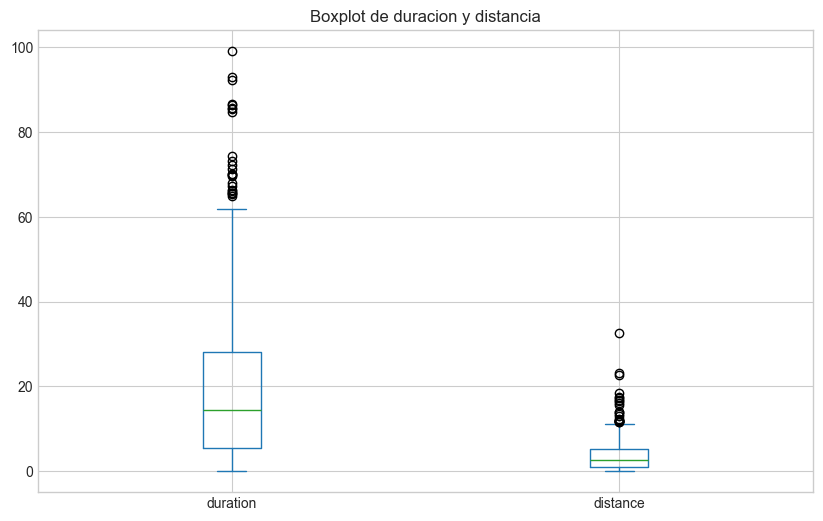

In [14]:
trips[["duration", "distance"]].plot(
    kind="box",
    figsize=(10, 6),
    title="Boxplot de duracion y distancia"
)
plt.show()

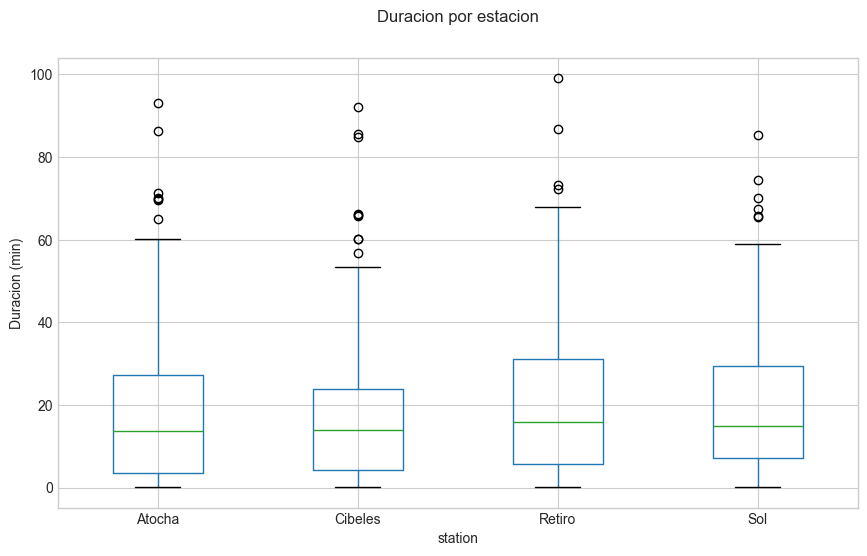

In [15]:
# Boxplot por grupo
trips.boxplot(
    column="duration",
    by="station",
    figsize=(10, 6)
)
plt.suptitle("Duracion por estacion")
plt.title("")
plt.ylabel("Duracion (min)")
plt.show()

---

## 5. Scatter plot

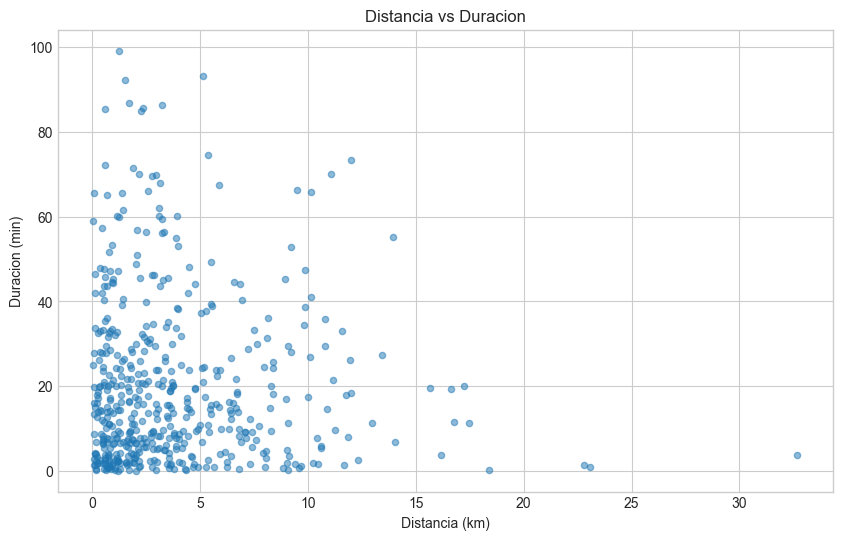

In [16]:
trips.plot(
    kind="scatter",
    x="distance",
    y="duration",
    figsize=(10, 6),
    alpha=0.5,
    title="Distancia vs Duracion"
)
plt.xlabel("Distancia (km)")
plt.ylabel("Duracion (min)")
plt.show()

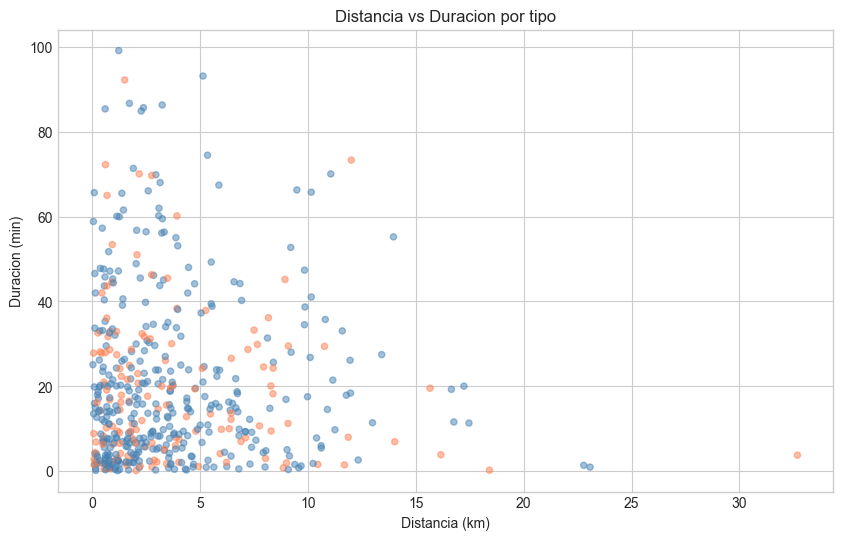

In [17]:
# Con color por categoria
colors = trips["user_type"].map({"subscriber": "steelblue", "casual": "coral"})

trips.plot(
    kind="scatter",
    x="distance",
    y="duration",
    c=colors,
    figsize=(10, 6),
    alpha=0.5,
    title="Distancia vs Duracion por tipo"
)
plt.xlabel("Distancia (km)")
plt.ylabel("Duracion (min)")
plt.show()

---

## 6. Pie chart

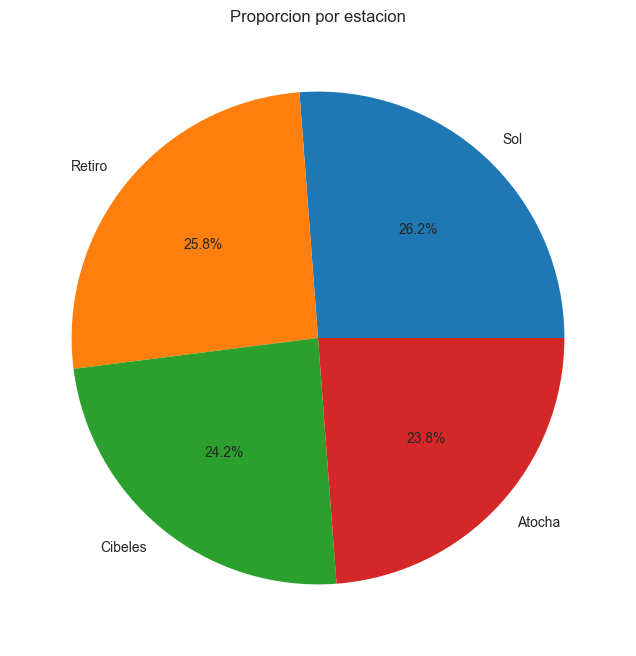

In [18]:
trips["station"].value_counts().plot(
    kind="pie",
    figsize=(8, 8),
    autopct="%1.1f%%",
    title="Proporcion por estacion"
)
plt.ylabel("")
plt.show()

---

## 7. Area plot

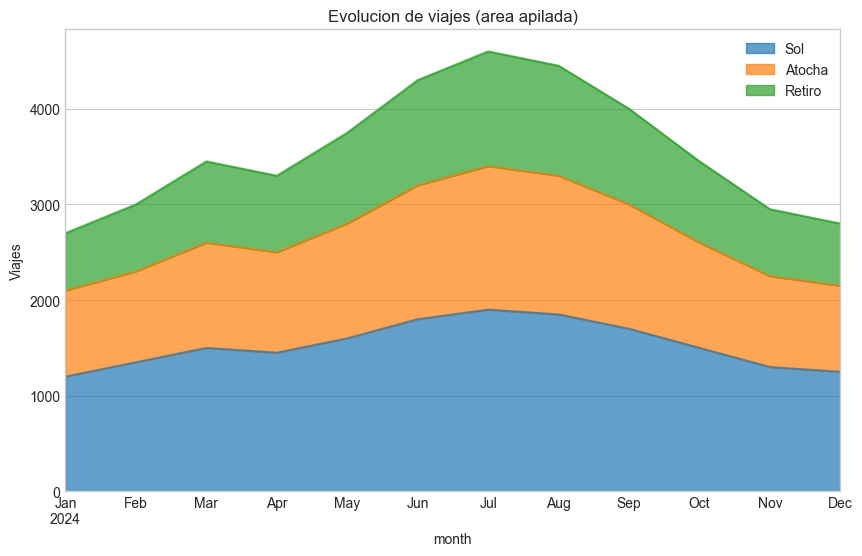

In [19]:
monthly.plot(
    kind="area",
    stacked=True,
    figsize=(10, 6),
    alpha=0.7,
    title="Evolucion de viajes (area apilada)"
)
plt.ylabel("Viajes")
plt.show()

---

## 8. Subplots desde DataFrame

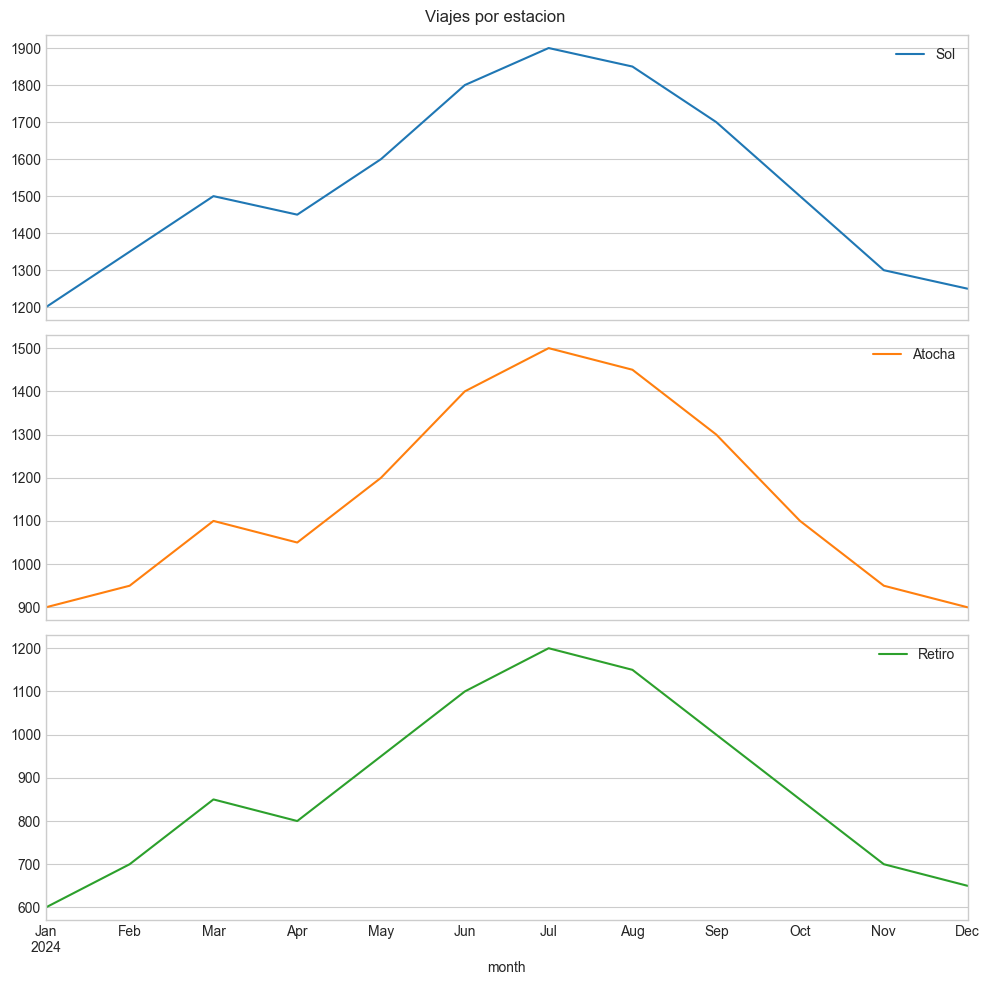

In [20]:
monthly.plot(
    subplots=True,
    figsize=(10, 10),
    layout=(3, 1),
    title="Viajes por estacion"
)
plt.tight_layout()
plt.show()

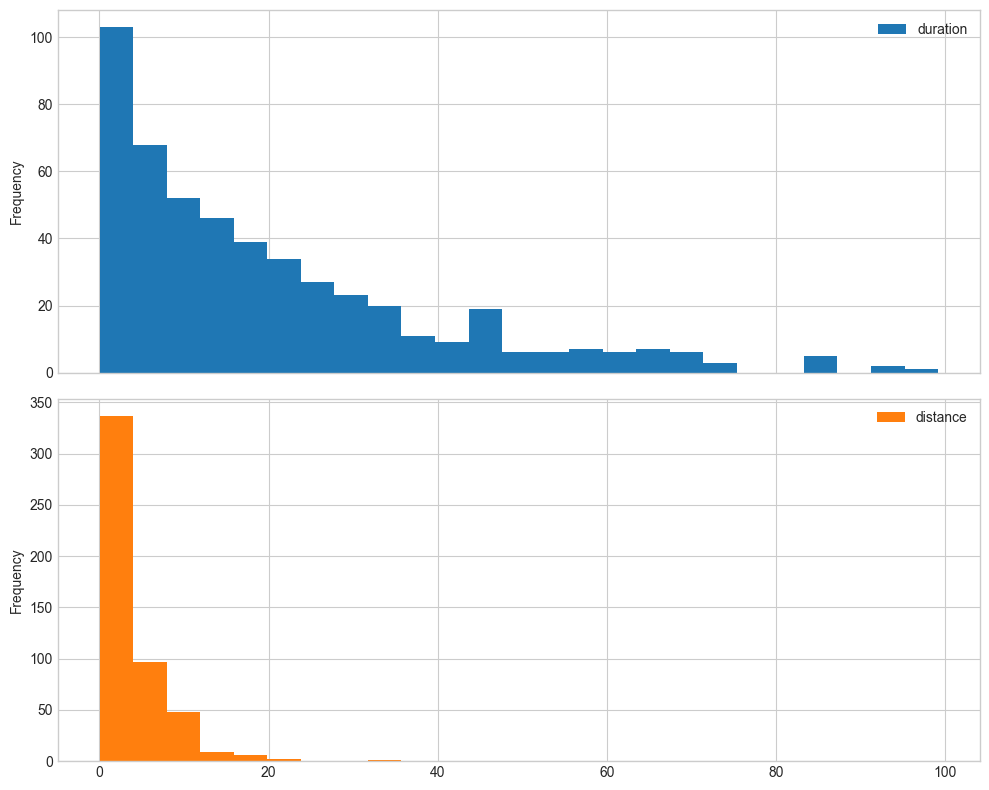

In [21]:
# Histogramas separados
trips[["duration", "distance"]].plot(
    kind="hist",
    subplots=True,
    figsize=(10, 8),
    bins=25,
    layout=(2, 1)
)
plt.tight_layout()
plt.show()

---

## Resumen

| Tipo | kind= |
|------|-------|
| Linea | `'line'` (default) |
| Barras | `'bar'`, `'barh'` |
| Histograma | `'hist'` |
| Box | `'box'` |
| Scatter | `'scatter'` |
| Pie | `'pie'` |
| Area | `'area'` |

**Ventajas de pandas plotting:**
- Rapido para exploracion
- Automatico con indices datetime
- Facil agrupar y comparar

---

**Anterior:** [07.01 - Matplotlib Basico](07_01_matplotlib_basics.ipynb)  
**Siguiente:** [07.03 - Seaborn](07_03_seaborn.ipynb)